In [207]:
#import packages
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

from PIL import Image
import requests
from io import BytesIO


from highlight_text import HighlightText, ax_text, fig_text
from datetime import date, datetime

In [29]:
#Import data 
df = pd.read_csv("/Users/maxtixador/Downloads/EH_std_sk_stats_all_regular_no_adj_2021-12-28.csv")
df.head()

,Player,Season,Team,Position,GP,TOI,G,A1,A2,Points,...,iHF,iHA,iPENT2,iPEND2,iPENT5,iPEND5,iPEN±,FOW,FOL,FO±
0,Aaron Ekblad,21-22,FLA,D,28,714.97,8,7,9,24,...,27,25,7,6,0,0,-1,0,0,0
1,Adam Boqvist,21-22,CBJ,D,18,287.68,6,1,2,9,...,6,18,1,5,0,0,4,0,0,0
2,Adam Brooks,21-22,VGK,C,5,56.93,1,0,0,1,...,1,8,1,1,0,0,0,16,12,4
3,Adam Erne,21-22,DET,L,30,425.77,3,6,0,9,...,69,17,1,4,2,2,3,18,18,0
4,Adam Fox,21-22,NYR,D,30,739.57,5,12,14,31,...,12,43,7,7,0,0,0,0,0,0


In [30]:
df.head()

,Player,Season,Team,Position,GP,TOI,G,A1,A2,Points,...,iHF,iHA,iPENT2,iPEND2,iPENT5,iPEND5,iPEN±,FOW,FOL,FO±
0,Aaron Ekblad,21-22,FLA,D,28,714.97,8,7,9,24,...,27,25,7,6,0,0,-1,0,0,0
1,Adam Boqvist,21-22,CBJ,D,18,287.68,6,1,2,9,...,6,18,1,5,0,0,4,0,0,0
2,Adam Brooks,21-22,VGK,C,5,56.93,1,0,0,1,...,1,8,1,1,0,0,0,16,12,4
3,Adam Erne,21-22,DET,L,30,425.77,3,6,0,9,...,69,17,1,4,2,2,3,18,18,0
4,Adam Fox,21-22,NYR,D,30,739.57,5,12,14,31,...,12,43,7,7,0,0,0,0,0,0


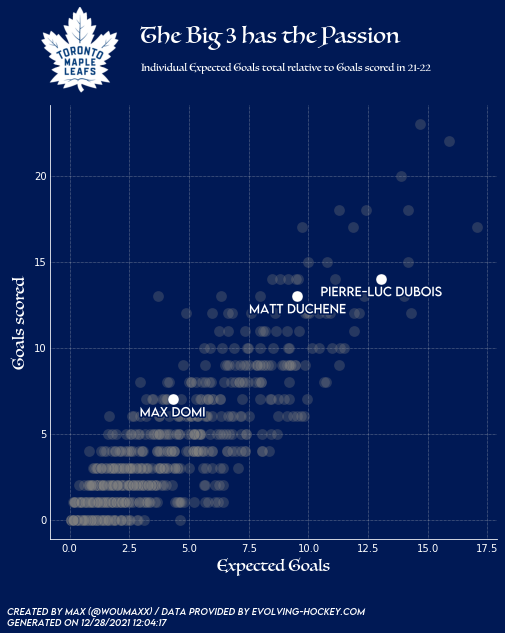

In [213]:
player = "Max Domi"
player1 = "Matt Duchene"
player2 = "Pierre-Luc Dubois"

title_font = "Luminari"
body_font = "LEMON MILK"
text_color = "w"
background = "#001955"
filler = "grey"
primary = "red"


mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = df.ixG.tolist()
y = df.G.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.3, lw=0.5, zorder=2)


#x = df[df.Player == player].ixG.tolist()
#y = df[df.Player == player].G.tolist()
#t = df[df.Player == player].Player.tolist()

x = df.loc[df['Player'] == player, 'ixG']
y = df.loc[df['Player'] == player, 'G']
t = player

x1 = df.loc[df['Player'] == player1, 'ixG']
y1 = df.loc[df['Player'] == player1, 'G']
t1 = player1

x2 = df.loc[df['Player'] == player2, 'ixG']
y2 = df.loc[df['Player'] == player2, 'G']
t2 = player2

ax.plot(x,y, zorder=3, color=text_color)

ax.scatter(x,y,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t = ax.text(x,y-1,t,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

ax.scatter(x1,y1,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t1 = ax.text(x1,y1-1,t1,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

ax.scatter(x2,y2,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t2 = ax.text(x2,y2-1,t2,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

fig.text(0.28,0.94, "The Big 3 has the Passion\n", fontweight="bold",fontsize=22, fontfamily=title_font,color=text_color)

fig.text(0.28,.94,"Individual Expected Goals total relative to Goals scored in 21-22",fontweight="regular", style ="italic", fontsize=10,fontfamily=title_font, color=text_color)

ax.set_xlabel("Expected Goals", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Goals scored", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)

#ax.set_ylim(90,18)
#ax.set_xlim(10,120)
#
#
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)




ax2 = fig.add_axes([0.1,0.90,0.15,0.15]) # badge
ax2.axis("off")
url = "https://ssl.mlse.digital/leafs/sweater/img/ml_logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

today = date.today()
now = datetime.now()
time = now.strftime("%m/%d/%Y %H:%M:%S")

fig.text(0.05, -0.025, f"Created by Max (@woumaxx) / Data provided by evolving-hockey.com\nGenerated on {time}",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)





#plt.savefig('Leafs.png', bbox_inches = "tight", dpi = 500)
plt.show()



In [172]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [211]:
print(x)

338    14.02
Name: ixG, dtype: float64
